In this notebook, we just look at avaialble variables in different nc files. We perform basic operations like readind ensemble data, means, plotting. For formal analysis, see other notebooks.

In [1]:
# Load libraries

import numpy as np
import xarray as xr
import cartopy
import matplotlib.pyplot as plt

## Global Means

Working with zonally integrated and volume integrated fields, which include global mean T, S, overturning circulaton and meridional heat transport profiles in the North Atlantic.  

In [3]:
# Read ensemble data for one year

ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/2008-az256/"

ds = []

for i in range(0,10):
    
    d = xr.open_mfdataset(ppdir + "r" + str(i+1) + "/onm/*.nc")
    ds.append(d)
    
ds = xr.concat(ds, dim='r')

ds['time'] = ds['time_centered'].astype("datetime64[ns]") # convert cftime to convenient form

In [2]:
#ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/2008-az256/"
#ds = xr.open_mfdataset(ppdir + "r001/onm//*.nc") 

In [5]:
print(ds)

save_path="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"
save_file = save_path + "2008_diaptr.nc"
ds_save = ds.load()
ds_save.to_netcdf(save_file)

<xarray.Dataset>
Dimensions:                  (axis_nbounds: 2, deptht: 75, depthw: 75, r: 10, time_counter: 125, x: 1, y: 451)
Coordinates:
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    nav_lat                  (y, x) float32 3.9967546 4.246108 ... 79.98739
    nav_lon                  (y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_centered            (time_counter) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
  * time_counter             (time_counter) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Dimensions without coordinates: axis_nbounds, r, x, y
Data variables:
    deptht_bounds            (r, time_counter, deptht, axis_nbounds) float32 dask.array<shape=(10, 125, 75, 2), chunksize=(1, 1, 75, 2)>
    depthw_bounds            (r, time_counter, depthw, axis_nbounds) float32 dask.array<shape=(10, 125, 75, 2), chunksize=(1, 1, 75, 2)>
    hfbasin_atlantic      

KeyboardInterrupt: 

(array([733042., 733773., 734503., 735234., 735964., 736695., 737425.]),
 <a list of 7 Text xticklabel objects>)

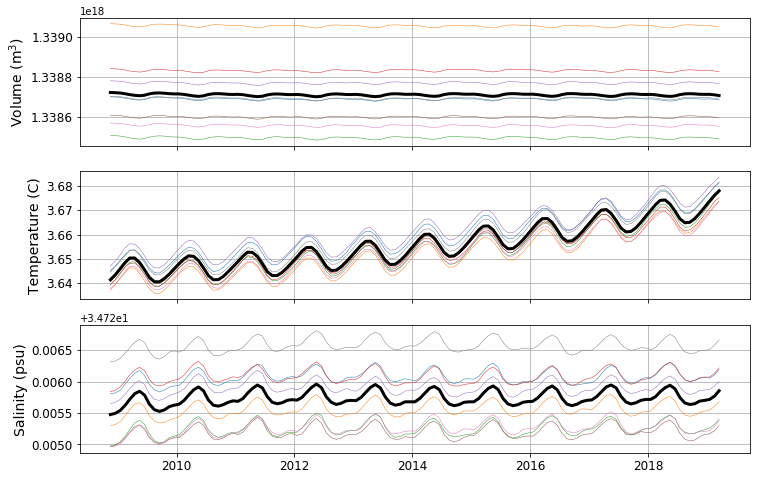

In [22]:
# Global mean temperature, salinity and total ocean volume time series for ensemble runs and their mean.

grid = plt.GridSpec(3, 1, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[12,8])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds.time, ds.scvoltot.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.scvoltot.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Volume (m$^3$)', fontsize=14)
ax.set_xticklabels([])
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.plot(ds.time, ds.thetaoga.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.thetaoga.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Temperature (C)', fontsize=14)
ax.set_xticklabels([])
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[2, 0])
ax.plot(ds.time, ds.soga.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.soga.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Salinity (psu)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

/opt/jaspy/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


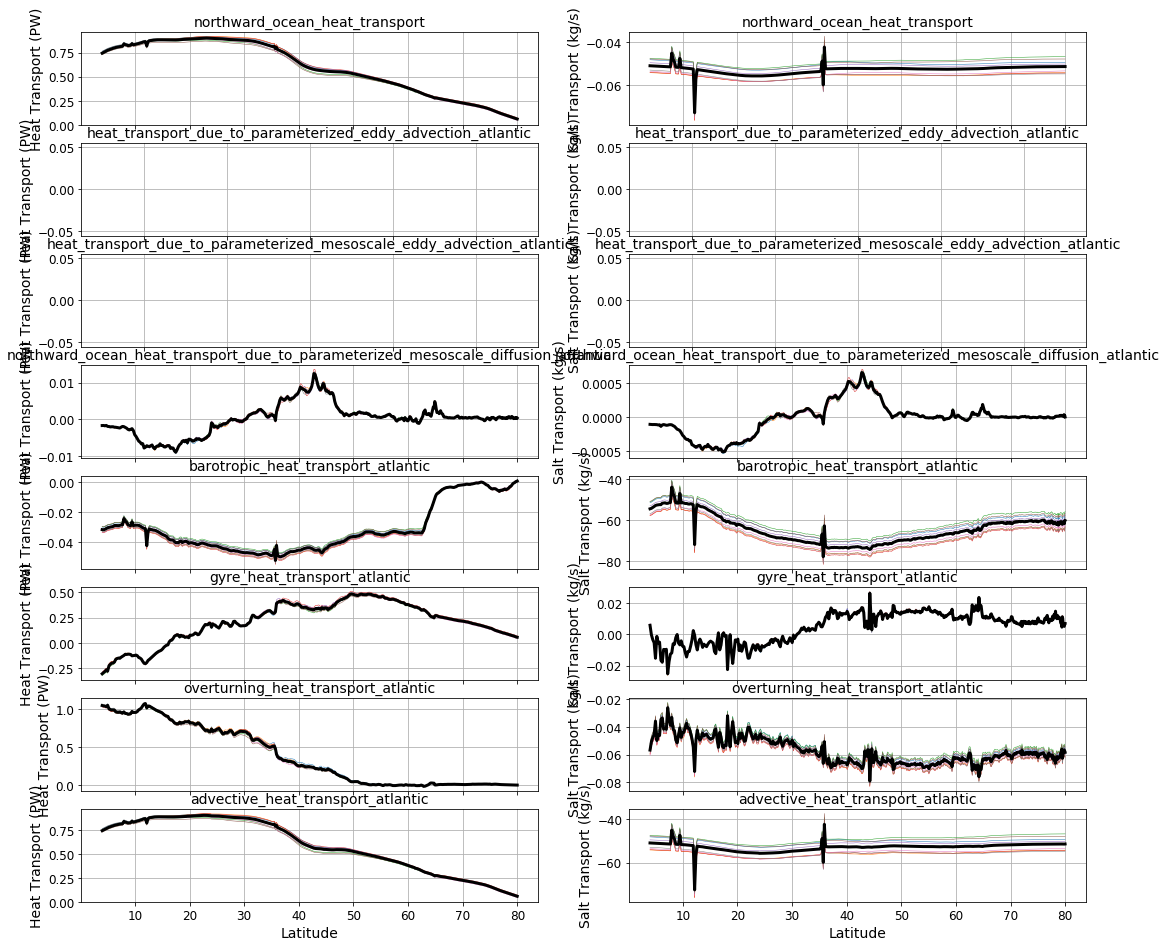

In [36]:
# Meridional heat transport and salt transport (titles should be for salt transport on right panels)

var_heat = ['hfbasin_atlantic', 'hfbasinpadv_atlantic', 'hfbasinpmadv_atlantic', 'hfbasinpmdiff_atlantic',
            'hfovbaro_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic']

var_salt = ['sltbasin_atlantic', 'sltbasinpadv_atlantic', 'sltbasinpmadv_atlantic', 'sltbasinpmdiff_atlantic',
            'sltovbaro_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic']

grid = plt.GridSpec(8, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,16])

for i in range(0, len(var_heat)):
    
    ax = fig.add_subplot(grid[i, 0])
    ax.plot(ds.nav_lat.isel(x=0), ds[var_heat[i]].mean(['x', 'time_counter']).transpose('y', 'r'), lw = 0.5)
    ax.plot(ds.nav_lat.isel(x=0), ds[var_heat[i]].mean(['x', 'time_counter', 'r']), lw = 3.0, color='k')
    ax.set_title(ds[var_heat[i]].standard_name, fontsize=14)
    ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
    if(i < len(var_heat) - 1):
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Latitude', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
for i in range(0, len(var_salt)):
    
    ax = fig.add_subplot(grid[i, 1])
    ax.plot(ds.nav_lat.isel(x=0), ds[var_salt[i]].mean(['x', 'time_counter']).transpose('y', 'r'), lw = 0.5)
    ax.plot(ds.nav_lat.isel(x=0), ds[var_salt[i]].mean(['x', 'time_counter', 'r']), lw = 3.0, color='k')
    ax.set_title(ds[var_salt[i]].standard_name, fontsize=14)
    ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
    if(i < len(var_heat) - 1):
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Latitude', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

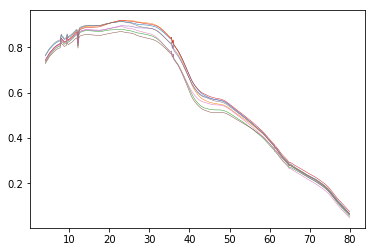

In [34]:
plt.plot(ds.nav_lat.isel(x=0), ds[var_heat[1]].mean(['x', 'time_counter', 'r']).transpose('y', 'r'), lw = 0.5);

In [39]:
ds[var_heat[1]].isel(x=0).mean(['time_counter', 'r']).values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [28]:
ds['sophtadv_atlantic'].standard_name

'advective_heat_transport_atlantic'

In [30]:
var_heat = ['hfbasin_atlantic', 'hfbasinpadv_atlantic', 'hfbasinpmadv_atlantic', 'hfbasinpmdiff_atlantic',
            'hfovbaro_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic']

var_salt = ['sltbasin_atlantic', 'sltbasinpadv_atlantic', 'sltbasinpmadv_atlantic', 'sltbasinpmdiff_atlantic',
            'sltovbaro_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic']

for var in var_heat:
    
    print(ds[var].standard_name)
          
for var in var_salt:
    
    print(ds[var].standard_name)

northward_ocean_heat_transport
heat_transport_due_to_parameterized_eddy_advection_atlantic
heat_transport_due_to_parameterized_mesoscale_eddy_advection_atlantic
northward_ocean_heat_transport_due_to_parameterized_mesoscale_diffusion_atlantic
barotropic_heat_transport_atlantic
gyre_heat_transport_atlantic
overturning_heat_transport_atlantic
advective_heat_transport_atlantic
northward_ocean_salt_transport_atlantic
salt_transport_due_to_parameterized_eddy_advection_atlantic
salt_transport_due_to_parameterized_mesoscale_eddy_advection_atlantic
northward_ocean_salt_transport_due_to_parameterized_mesoscale_diffusion_atlantic
barotropic_salt_transport_atlantic
gyre_salt_transport_atlantic
overturning_salt_transport_atlantic
advective_salt_transport_atlantic


In [32]:
len(var_heat)

8